In [1]:
#Import data
import pandas as pd
df_retail_sales = pd.read_csv('./input/data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df_retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [2]:
#Do basic data cleaning

# Convert InvoiceDate into Date type
#Remove rows where Quantity is negative. Remove rows with NULL values



df_retail_sales['InvoiceDate'] = pd.to_datetime(df_retail_sales.InvoiceDate, format='%m/%d/%Y %H:%M')
df_retail_sales = df_retail_sales[df_retail_sales.Quantity > 0]
retail_sales = df_retail_sales.dropna()


In [3]:
#Feature Engineering.

retail_sales['AmountSpent'] = retail_sales['Quantity'] * retail_sales['UnitPrice']
retail_sales.insert(loc=6, column='YearMonth', value=retail_sales['InvoiceDate'].map(lambda x: 100*x.year + x.month))
retail_sales.insert(loc=7, column='Month', value=retail_sales.InvoiceDate.dt.month)
retail_sales.insert(loc=8, column='Day', value=(retail_sales.InvoiceDate.dt.dayofweek)+1)
retail_sales.insert(loc=9, column='Hour', value=retail_sales.InvoiceDate.dt.hour)


C:\Users\GauravGoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   YearMonth    397924 non-null  int64         
 7   Month        397924 non-null  int64         
 8   Day          397924 non-null  int64         
 9   Hour         397924 non-null  int64         
 10  CustomerID   397924 non-null  object        
 11  Country      397924 non-null  object        
 12  AmountSpent  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 42.5+ MB


In [5]:
#Total No of Customers

retail_sales['CustomerID'].nunique()

4339

In [6]:
orders = retail_sales.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
orders.rename(columns={'InvoiceNo': 'Cnt_Invoices'}, inplace=True)
orders=orders.sort_values(by='Cnt_Invoices', ascending=False).head(10)


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
color = sns.color_palette()

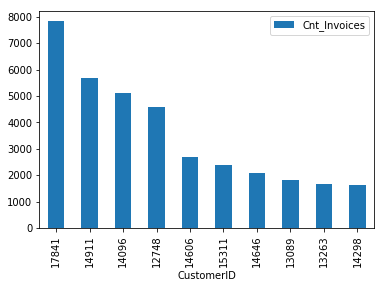

In [8]:
orders.plot(x="CustomerID", y=["Cnt_Invoices"], kind="bar")

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4011 to 1435
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    10 non-null     object
 1   Cnt_Invoices  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


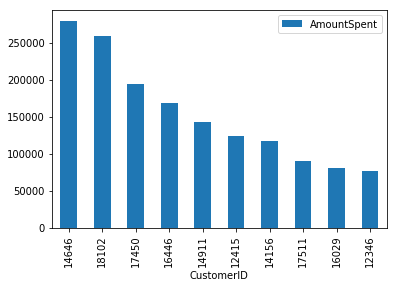

In [10]:
# Top 10 Spendings

spending = retail_sales.groupby(by=['CustomerID'], as_index=False)['AmountSpent'].sum()

spending = spending.sort_values(by='AmountSpent', ascending=False).head(10)

spending.plot(x="CustomerID", y=["AmountSpent"], kind="bar")

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
color = sns.color_palette()

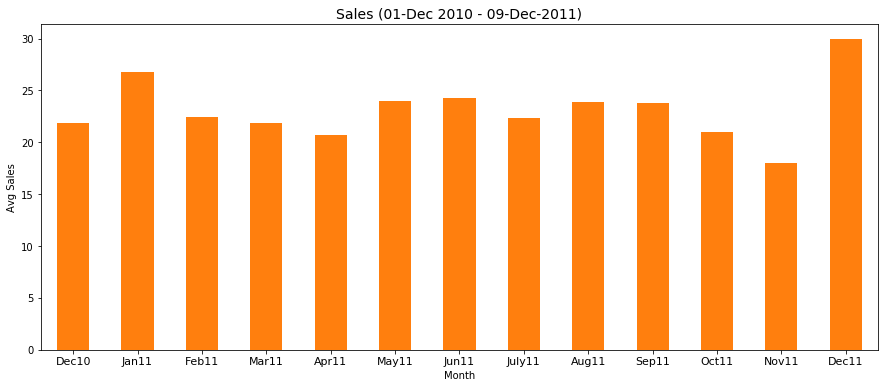

In [15]:
ax = retail_sales.groupby('YearMonth')['AmountSpent'].mean().sort_index().plot(kind='bar',color=color[1],figsize=(15,6))
ax.set_xlabel('Month',fontsize=10)
ax.set_ylabel('Avg Sales',fontsize=10)
ax.set_title('Sales (01-Dec 2010 - 09-Dec-2011)',fontsize=14)
ax.set_xticklabels(('Dec10','Jan11','Feb11','Mar11','Apr11','May11','Jun11','July11','Aug11','Sep11','Oct11','Nov11','Dec11'), rotation='horizontal', fontsize=11)
plt.show()

In [13]:
retail_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,YearMonth,Month,Day,Hour,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,201012,12,3,8,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,201012,12,3,8,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,201012,12,3,8,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,201012,12,3,8,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,201012,12,3,8,17850,United Kingdom,20.34


In [16]:
customer_data=retail_sales.groupby('CustomerID').agg(
    # Get max of the duration column for each group
   TotalOrders=('InvoiceNo', 'count'),
    # Get min of the duration column for each group
    TotalSpending=('AmountSpent', 'sum'),
    # Get sum of the duration column for each group
    EarliestInvoice=('InvoiceDate', 'min'),
    # Apply a lambda to date column
    LatestInvoice=('InvoiceDate', 'max')
)

In [17]:
customer_data.head()

,TotalOrders,TotalSpending,EarliestInvoice,LatestInvoice
CustomerID,,,,
12346,1,77183.60,2011-01-18 10:01:00,2011-01-18 10:01:00
12347,182,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00
12348,31,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00
12349,73,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00
12350,17,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00
